# 데이터 로드 및 전처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
 from tqdm import tqdm

In [3]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

cuda


In [4]:
BATCH_SIZE = 32
EPOCHS = 10

In [5]:
# CIFAR10 데이터 이용

train_dataset = datasets.CIFAR10(root='./', download=True, train=True, transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='./', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [6]:
for (X_train, y_train) in train_loader:
  print('X_train : ', X_train.size(), 'type : ', X_train.type())
  print('y_train : ', y_train.size(), 'type : ', y_train.type())
  break

X_train :  torch.Size([32, 3, 32, 32]) type :  torch.FloatTensor
y_train :  torch.Size([32]) type :  torch.LongTensor


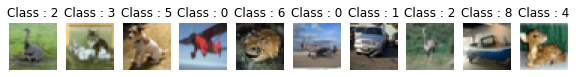

In [7]:
psize = 1
plt.figure(figsize=(10* psize, psize))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  # torch.size에서 볼 수 있듯이 채널이 앞에 있어서 (3,32,32)의 형태를 갖고 있다. imshow로 불러오면 (width, height, channel)이 되야하므로 transpose를 통해 디맨션 순서를 바꿔주자.
  plt.imshow(np.transpose(X_train[i], (1,2,0)))
  plt.title('Class : '+ str(y_train[i].item()))

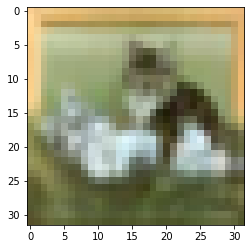

In [8]:
plt.imshow(np.transpose(X_train[1], (1,2,0)))

# MLP Image

In [9]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 32*32*3)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [10]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [11]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print('Train Epoch : {} [{}{} ({:.0f}%)] \t Train Loss : {:.6f}'.format(Epoch, batch_idx*len(image), len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item()))


In [12]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim=True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()
  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [16]:
for Epoch in tqdm(range(1, EPOCHS+1)):
  print()
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print('\n [EPOCH : {}], \t Test Loss : {:.4f}, \t Test Accuracy : {:.2f} %\n'.format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]


Train Epoch : 1 [050000 (0%)] 	 Train Loss : 1.214333
Train Epoch : 1 [640050000 (13%)] 	 Train Loss : 1.618104
Train Epoch : 1 [1280050000 (26%)] 	 Train Loss : 1.458710
Train Epoch : 1 [1920050000 (38%)] 	 Train Loss : 1.568943
Train Epoch : 1 [2560050000 (51%)] 	 Train Loss : 1.507592
Train Epoch : 1 [3200050000 (64%)] 	 Train Loss : 1.387395
Train Epoch : 1 [3840050000 (77%)] 	 Train Loss : 1.573599
Train Epoch : 1 [4480050000 (90%)] 	 Train Loss : 1.530981


 10%|█         | 1/10 [00:15<02:17, 15.28s/it]


 [EPOCH : 1], 	 Test Loss : 0.0484, 	 Test Accuracy : 44.87 %


Train Epoch : 2 [050000 (0%)] 	 Train Loss : 1.325342
Train Epoch : 2 [640050000 (13%)] 	 Train Loss : 1.617566
Train Epoch : 2 [1280050000 (26%)] 	 Train Loss : 1.488918
Train Epoch : 2 [1920050000 (38%)] 	 Train Loss : 1.499761
Train Epoch : 2 [2560050000 (51%)] 	 Train Loss : 1.417610
Train Epoch : 2 [3200050000 (64%)] 	 Train Loss : 1.562626
Train Epoch : 2 [3840050000 (77%)] 	 Train Loss : 1.487032
Train Epoch : 2 [4480050000 (90%)] 	 Train Loss : 1.402178


 20%|██        | 2/10 [00:31<02:05, 15.69s/it]


 [EPOCH : 2], 	 Test Loss : 0.0492, 	 Test Accuracy : 43.92 %


Train Epoch : 3 [050000 (0%)] 	 Train Loss : 1.807565
Train Epoch : 3 [640050000 (13%)] 	 Train Loss : 1.624365
Train Epoch : 3 [1280050000 (26%)] 	 Train Loss : 1.600623
Train Epoch : 3 [1920050000 (38%)] 	 Train Loss : 1.828198
Train Epoch : 3 [2560050000 (51%)] 	 Train Loss : 1.381845
Train Epoch : 3 [3200050000 (64%)] 	 Train Loss : 1.659829
Train Epoch : 3 [3840050000 (77%)] 	 Train Loss : 1.279150
Train Epoch : 3 [4480050000 (90%)] 	 Train Loss : 1.441016


 30%|███       | 3/10 [00:48<01:54, 16.40s/it]


 [EPOCH : 3], 	 Test Loss : 0.0471, 	 Test Accuracy : 46.16 %


Train Epoch : 4 [050000 (0%)] 	 Train Loss : 1.548307
Train Epoch : 4 [640050000 (13%)] 	 Train Loss : 1.388921
Train Epoch : 4 [1280050000 (26%)] 	 Train Loss : 1.631265
Train Epoch : 4 [1920050000 (38%)] 	 Train Loss : 1.206782
Train Epoch : 4 [2560050000 (51%)] 	 Train Loss : 1.616357
Train Epoch : 4 [3200050000 (64%)] 	 Train Loss : 1.529861
Train Epoch : 4 [3840050000 (77%)] 	 Train Loss : 1.421030
Train Epoch : 4 [4480050000 (90%)] 	 Train Loss : 1.389441


 40%|████      | 4/10 [01:03<01:35, 15.92s/it]


 [EPOCH : 4], 	 Test Loss : 0.0454, 	 Test Accuracy : 48.40 %


Train Epoch : 5 [050000 (0%)] 	 Train Loss : 1.278640
Train Epoch : 5 [640050000 (13%)] 	 Train Loss : 1.310822
Train Epoch : 5 [1280050000 (26%)] 	 Train Loss : 1.706510
Train Epoch : 5 [1920050000 (38%)] 	 Train Loss : 1.409708
Train Epoch : 5 [2560050000 (51%)] 	 Train Loss : 1.590507
Train Epoch : 5 [3200050000 (64%)] 	 Train Loss : 1.195813
Train Epoch : 5 [3840050000 (77%)] 	 Train Loss : 1.333159
Train Epoch : 5 [4480050000 (90%)] 	 Train Loss : 0.984078


 50%|█████     | 5/10 [01:18<01:17, 15.53s/it]


 [EPOCH : 5], 	 Test Loss : 0.0466, 	 Test Accuracy : 46.31 %


Train Epoch : 6 [050000 (0%)] 	 Train Loss : 1.397251
Train Epoch : 6 [640050000 (13%)] 	 Train Loss : 1.490708
Train Epoch : 6 [1280050000 (26%)] 	 Train Loss : 1.509278
Train Epoch : 6 [1920050000 (38%)] 	 Train Loss : 1.216780
Train Epoch : 6 [2560050000 (51%)] 	 Train Loss : 1.538490
Train Epoch : 6 [3200050000 (64%)] 	 Train Loss : 1.048885
Train Epoch : 6 [3840050000 (77%)] 	 Train Loss : 1.404173
Train Epoch : 6 [4480050000 (90%)] 	 Train Loss : 1.229672


 60%|██████    | 6/10 [01:33<01:00, 15.24s/it]


 [EPOCH : 6], 	 Test Loss : 0.0460, 	 Test Accuracy : 47.48 %


Train Epoch : 7 [050000 (0%)] 	 Train Loss : 1.611066
Train Epoch : 7 [640050000 (13%)] 	 Train Loss : 1.521471
Train Epoch : 7 [1280050000 (26%)] 	 Train Loss : 1.523484
Train Epoch : 7 [1920050000 (38%)] 	 Train Loss : 1.382991
Train Epoch : 7 [2560050000 (51%)] 	 Train Loss : 1.099091
Train Epoch : 7 [3200050000 (64%)] 	 Train Loss : 1.400425
Train Epoch : 7 [3840050000 (77%)] 	 Train Loss : 1.409879
Train Epoch : 7 [4480050000 (90%)] 	 Train Loss : 1.330456


 70%|███████   | 7/10 [01:48<00:45, 15.13s/it]


 [EPOCH : 7], 	 Test Loss : 0.0456, 	 Test Accuracy : 48.45 %


Train Epoch : 8 [050000 (0%)] 	 Train Loss : 1.382152
Train Epoch : 8 [640050000 (13%)] 	 Train Loss : 1.308968
Train Epoch : 8 [1280050000 (26%)] 	 Train Loss : 1.233671
Train Epoch : 8 [1920050000 (38%)] 	 Train Loss : 1.987323
Train Epoch : 8 [2560050000 (51%)] 	 Train Loss : 1.400832
Train Epoch : 8 [3200050000 (64%)] 	 Train Loss : 1.641722
Train Epoch : 8 [3840050000 (77%)] 	 Train Loss : 1.651800
Train Epoch : 8 [4480050000 (90%)] 	 Train Loss : 1.830163


 80%|████████  | 8/10 [02:02<00:30, 15.00s/it]


 [EPOCH : 8], 	 Test Loss : 0.0458, 	 Test Accuracy : 48.45 %


Train Epoch : 9 [050000 (0%)] 	 Train Loss : 1.131272
Train Epoch : 9 [640050000 (13%)] 	 Train Loss : 1.198769
Train Epoch : 9 [1280050000 (26%)] 	 Train Loss : 1.105009
Train Epoch : 9 [1920050000 (38%)] 	 Train Loss : 1.204944
Train Epoch : 9 [2560050000 (51%)] 	 Train Loss : 1.504452
Train Epoch : 9 [3200050000 (64%)] 	 Train Loss : 1.625001
Train Epoch : 9 [3840050000 (77%)] 	 Train Loss : 1.470900
Train Epoch : 9 [4480050000 (90%)] 	 Train Loss : 1.507586


 90%|█████████ | 9/10 [02:21<00:16, 16.25s/it]


 [EPOCH : 9], 	 Test Loss : 0.0444, 	 Test Accuracy : 49.49 %


Train Epoch : 10 [050000 (0%)] 	 Train Loss : 1.093626
Train Epoch : 10 [640050000 (13%)] 	 Train Loss : 0.991867
Train Epoch : 10 [1280050000 (26%)] 	 Train Loss : 1.713693
Train Epoch : 10 [1920050000 (38%)] 	 Train Loss : 1.078536
Train Epoch : 10 [2560050000 (51%)] 	 Train Loss : 1.211661
Train Epoch : 10 [3200050000 (64%)] 	 Train Loss : 1.408047
Train Epoch : 10 [3840050000 (77%)] 	 Train Loss : 1.163909
Train Epoch : 10 [4480050000 (90%)] 	 Train Loss : 1.115431


100%|██████████| 10/10 [02:42<00:00, 16.23s/it]


 [EPOCH : 10], 	 Test Loss : 0.0455, 	 Test Accuracy : 49.07 %



MLP는 MNIST만 해도 정확도가 98프로 정도였는데 이미지에 대한 정확도는 확 줄어든다. 왜냐하면 Flatten과정 중 이미지 픽셀에대한 spartial 정보를 잃기 때문에.
이미지의 특징을 잃어버린다

CNN Image

In [9]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(
        in_channels = 3,
        out_channels = 8,
        kernel_size = 3,
        padding=1)
    self.conv2 = nn.Conv2d(
        in_channels = 8,
        out_channels = 16,
        kernel_size = 3,
        padding=1)
    self.pool = nn.MaxPool2d(
        kernel_size = 2,
        stride = 2)
    # conv - pool - conv - pool 해서 계산하면 8x8x16 사이즈가 나옴
    self.fc1 = nn.Linear(8*8*16, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = x.view(-1, 8*8*16)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x)
    return x

In [10]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [13]:
for Epoch in tqdm(range(1, EPOCHS+1)):
  print()
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print('\n [EPOCH : {}], \t Test Loss : {:.4f}, \t Test Accuracy : {:.2f} %\n'.format(Epoch, test_loss, test_accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Train Epoch : 1 [050000 (0%)] 	 Train Loss : 2.295398
Train Epoch : 1 [640050000 (13%)] 	 Train Loss : 2.072599
Train Epoch : 1 [1280050000 (26%)] 	 Train Loss : 1.871016
Train Epoch : 1 [1920050000 (38%)] 	 Train Loss : 1.646638
Train Epoch : 1 [2560050000 (51%)] 	 Train Loss : 1.743483
Train Epoch : 1 [3200050000 (64%)] 	 Train Loss : 1.500638
Train Epoch : 1 [3840050000 (77%)] 	 Train Loss : 1.610117
Train Epoch : 1 [4480050000 (90%)] 	 Train Loss : 1.545628


 10%|█         | 1/10 [00:22<03:25, 22.81s/it]


 [EPOCH : 1], 	 Test Loss : 0.0469, 	 Test Accuracy : 45.70 %


Train Epoch : 2 [050000 (0%)] 	 Train Loss : 1.623793
Train Epoch : 2 [640050000 (13%)] 	 Train Loss : 1.382366
Train Epoch : 2 [1280050000 (26%)] 	 Train Loss : 1.495788
Train Epoch : 2 [1920050000 (38%)] 	 Train Loss : 1.712782
Train Epoch : 2 [2560050000 (51%)] 	 Train Loss : 1.761125
Train Epoch : 2 [3200050000 (64%)] 	 Train Loss : 1.344449
Train Epoch : 2 [3840050000 (77%)] 	 Train Loss : 1.326811
Train Epoch : 2 [4480050000 (90%)] 	 Train Loss : 1.364873


 20%|██        | 2/10 [00:42<02:48, 21.03s/it]


 [EPOCH : 2], 	 Test Loss : 0.0428, 	 Test Accuracy : 49.70 %


Train Epoch : 3 [050000 (0%)] 	 Train Loss : 1.297700
Train Epoch : 3 [640050000 (13%)] 	 Train Loss : 1.281237
Train Epoch : 3 [1280050000 (26%)] 	 Train Loss : 1.306077
Train Epoch : 3 [1920050000 (38%)] 	 Train Loss : 1.564764
Train Epoch : 3 [2560050000 (51%)] 	 Train Loss : 1.538567
Train Epoch : 3 [3200050000 (64%)] 	 Train Loss : 1.223446
Train Epoch : 3 [3840050000 (77%)] 	 Train Loss : 1.327346
Train Epoch : 3 [4480050000 (90%)] 	 Train Loss : 1.158694


 30%|███       | 3/10 [01:00<02:18, 19.79s/it]


 [EPOCH : 3], 	 Test Loss : 0.0394, 	 Test Accuracy : 54.78 %


Train Epoch : 4 [050000 (0%)] 	 Train Loss : 1.284044
Train Epoch : 4 [640050000 (13%)] 	 Train Loss : 1.266368
Train Epoch : 4 [1280050000 (26%)] 	 Train Loss : 1.111940
Train Epoch : 4 [1920050000 (38%)] 	 Train Loss : 1.488648
Train Epoch : 4 [2560050000 (51%)] 	 Train Loss : 1.099541
Train Epoch : 4 [3200050000 (64%)] 	 Train Loss : 1.036345
Train Epoch : 4 [3840050000 (77%)] 	 Train Loss : 1.316663
Train Epoch : 4 [4480050000 (90%)] 	 Train Loss : 1.110275


 40%|████      | 4/10 [01:19<01:55, 19.28s/it]


 [EPOCH : 4], 	 Test Loss : 0.0388, 	 Test Accuracy : 56.19 %


Train Epoch : 5 [050000 (0%)] 	 Train Loss : 1.351438
Train Epoch : 5 [640050000 (13%)] 	 Train Loss : 0.917451
Train Epoch : 5 [1280050000 (26%)] 	 Train Loss : 1.219221
Train Epoch : 5 [1920050000 (38%)] 	 Train Loss : 1.275143
Train Epoch : 5 [2560050000 (51%)] 	 Train Loss : 1.044759
Train Epoch : 5 [3200050000 (64%)] 	 Train Loss : 1.208581
Train Epoch : 5 [3840050000 (77%)] 	 Train Loss : 1.277024
Train Epoch : 5 [4480050000 (90%)] 	 Train Loss : 1.260074


 50%|█████     | 5/10 [01:37<01:34, 18.87s/it]


 [EPOCH : 5], 	 Test Loss : 0.0364, 	 Test Accuracy : 59.08 %


Train Epoch : 6 [050000 (0%)] 	 Train Loss : 1.495658
Train Epoch : 6 [640050000 (13%)] 	 Train Loss : 0.954538
Train Epoch : 6 [1280050000 (26%)] 	 Train Loss : 0.989862
Train Epoch : 6 [1920050000 (38%)] 	 Train Loss : 0.907061
Train Epoch : 6 [2560050000 (51%)] 	 Train Loss : 1.126968
Train Epoch : 6 [3200050000 (64%)] 	 Train Loss : 1.273593
Train Epoch : 6 [3840050000 (77%)] 	 Train Loss : 1.517933
Train Epoch : 6 [4480050000 (90%)] 	 Train Loss : 1.269919


 60%|██████    | 6/10 [01:56<01:14, 18.74s/it]


 [EPOCH : 6], 	 Test Loss : 0.0365, 	 Test Accuracy : 58.75 %


Train Epoch : 7 [050000 (0%)] 	 Train Loss : 0.862325
Train Epoch : 7 [640050000 (13%)] 	 Train Loss : 1.294118
Train Epoch : 7 [1280050000 (26%)] 	 Train Loss : 1.041521
Train Epoch : 7 [1920050000 (38%)] 	 Train Loss : 0.953214
Train Epoch : 7 [2560050000 (51%)] 	 Train Loss : 1.241786
Train Epoch : 7 [3200050000 (64%)] 	 Train Loss : 0.683345
Train Epoch : 7 [3840050000 (77%)] 	 Train Loss : 1.615325
Train Epoch : 7 [4480050000 (90%)] 	 Train Loss : 0.706219


 70%|███████   | 7/10 [02:14<00:56, 18.79s/it]


 [EPOCH : 7], 	 Test Loss : 0.0348, 	 Test Accuracy : 60.70 %


Train Epoch : 8 [050000 (0%)] 	 Train Loss : 1.152550
Train Epoch : 8 [640050000 (13%)] 	 Train Loss : 0.849144
Train Epoch : 8 [1280050000 (26%)] 	 Train Loss : 0.898118
Train Epoch : 8 [1920050000 (38%)] 	 Train Loss : 1.172694
Train Epoch : 8 [2560050000 (51%)] 	 Train Loss : 1.060047
Train Epoch : 8 [3200050000 (64%)] 	 Train Loss : 1.103725
Train Epoch : 8 [3840050000 (77%)] 	 Train Loss : 1.367400
Train Epoch : 8 [4480050000 (90%)] 	 Train Loss : 0.625697


 80%|████████  | 8/10 [02:34<00:37, 18.91s/it]


 [EPOCH : 8], 	 Test Loss : 0.0342, 	 Test Accuracy : 61.51 %


Train Epoch : 9 [050000 (0%)] 	 Train Loss : 1.177656
Train Epoch : 9 [640050000 (13%)] 	 Train Loss : 0.698769
Train Epoch : 9 [1280050000 (26%)] 	 Train Loss : 1.427015
Train Epoch : 9 [1920050000 (38%)] 	 Train Loss : 0.996990
Train Epoch : 9 [2560050000 (51%)] 	 Train Loss : 1.194840
Train Epoch : 9 [3200050000 (64%)] 	 Train Loss : 1.063673
Train Epoch : 9 [3840050000 (77%)] 	 Train Loss : 1.010755
Train Epoch : 9 [4480050000 (90%)] 	 Train Loss : 0.972142


 90%|█████████ | 9/10 [02:52<00:18, 18.66s/it]


 [EPOCH : 9], 	 Test Loss : 0.0345, 	 Test Accuracy : 61.88 %


Train Epoch : 10 [050000 (0%)] 	 Train Loss : 0.744608
Train Epoch : 10 [640050000 (13%)] 	 Train Loss : 1.075200
Train Epoch : 10 [1280050000 (26%)] 	 Train Loss : 1.025612
Train Epoch : 10 [1920050000 (38%)] 	 Train Loss : 1.471562
Train Epoch : 10 [2560050000 (51%)] 	 Train Loss : 1.018602
Train Epoch : 10 [3200050000 (64%)] 	 Train Loss : 1.280150
Train Epoch : 10 [3840050000 (77%)] 	 Train Loss : 1.010579
Train Epoch : 10 [4480050000 (90%)] 	 Train Loss : 1.097519


100%|██████████| 10/10 [03:10<00:00, 19.01s/it]


 [EPOCH : 10], 	 Test Loss : 0.0331, 	 Test Accuracy : 63.29 %

